In [53]:
import seaborn as sns
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from regressors import  stats as sts
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scipy import stats

train = pd.read_csv("/Users/rezaghaemi/Desktop/RapidMiner:Data Analysis FILES/Lecture files/HeatingOil_Training LINEAR REGRESSION.csv")




In [54]:

train.isnull().sum()



Insulation        0
Temperature       0
Heating_Oil       0
Num_Occupants     0
Avg_Age          14
Home_Size         0
dtype: int64

/Users/rezaghaemi/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/rezaghaemi/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 88., 155., 113., 121., 148., 129., 133., 143., 119.,  55.]),
 array([15.1 , 20.81, 26.52, 32.23, 37.94, 43.65, 49.36, 55.07, 60.78,
        66.49, 72.2 ]),
 <a list of 10 Patch objects>)

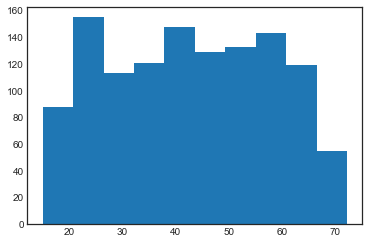

In [55]:
plt.style.use('seaborn-white')
plt.hist(train['Avg_Age'])

In [56]:
train['Avg_Age'].fillna(train['Avg_Age'].mean(), inplace=True)

train.isnull().sum()

Insulation       0
Temperature      0
Heating_Oil      0
Num_Occupants    0
Avg_Age          0
Home_Size        0
dtype: int64

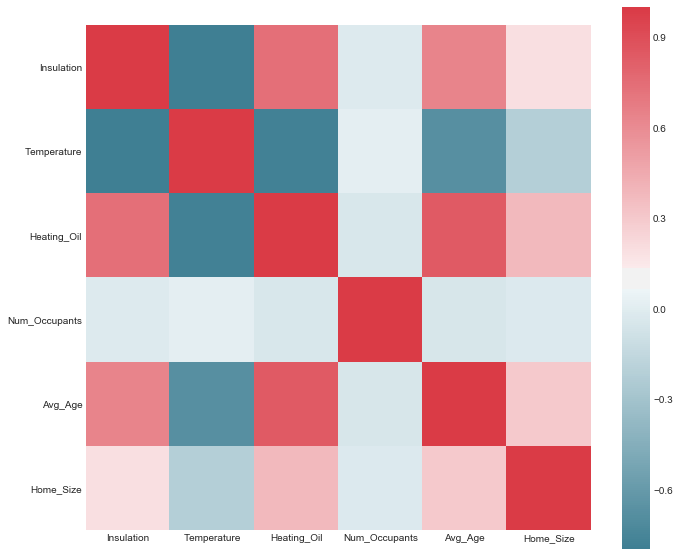

In [57]:

f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.tight_layout()


Scatter Matrix: 


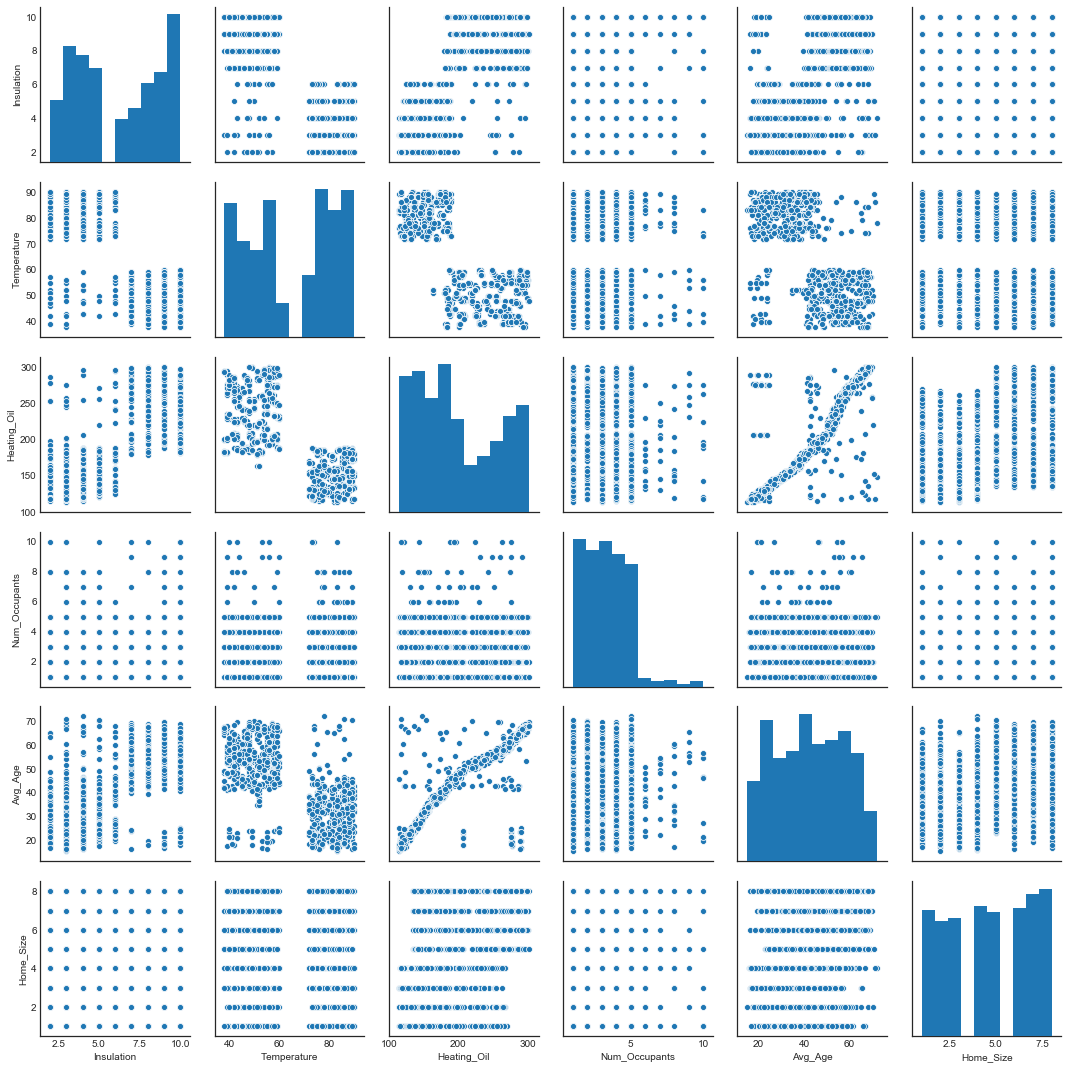

In [58]:
sns.pairplot(train)
print("Scatter Matrix: ")

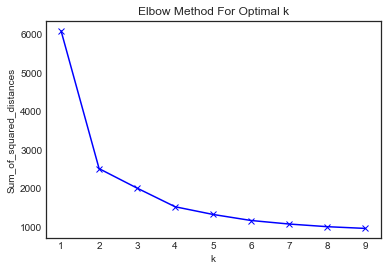

In [59]:
'''
mms = MinMaxScaler()
mms.fit(train)
data_transformed = mms.transform(train)



Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
'''

df_tr = train

clmns = ['Insulation', 'Temperature', 'Avg_Age', 'Home_Size',  'Heating_Oil']
#Standardize
df_tr_std = stats.zscore(df_tr[clmns])

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_tr_std)
    Sum_of_squared_distances.append(km.inertia_)
    
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [73]:

clmns = ['Insulation', 'Temperature', 'Avg_Age', 'Home_Size', 'Heating_Oil']


#Cluster the data
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_tr_std)
labels = kmeans.labels_

#Glue back to originaal data
df_tr['clusters'] = labels

#Add the column into our list
clmns.extend(['clusters'])

new_df = df_tr[clmns].groupby(['clusters']).mean()
#Lets analyze the clusters
print (new_df)






          Insulation  Temperature    Avg_Age  Home_Size  Heating_Oil
clusters                                                            
0           3.878327    79.916350  36.434490   6.437262   162.292776
1           8.709949    49.315346  54.155045   5.193929   246.541315
2           3.823204    80.121547  28.462667   2.458564   142.386740


In [61]:
train = train.drop('clusters', 1)
#train = pd.read_csv("/Users/rezaghaemi/Desktop/RapidMiner:Data Analysis FILES/Lecture files/HeatingOil_Training LINEAR REGRESSION.csv")
feature_input = ['Insulation', 'Temperature', 'Num_Occupants', 'Avg_Age', 'Home_Size']
X_oil = train[feature_input]
y_oil = train['Heating_Oil']

X_train, X_test, y_train, y_test = train_test_split(X_oil, y_oil, test_size = 0.2)

print("Size of the test and train sets:")
print ("Train: ",X_train.shape, y_train.shape)
print ("Test: ", X_test.shape, y_test.shape)


Size of the test and train sets:
Train:  (974, 5) (974,)
Test:  (244, 5) (244,)


In [62]:



linreg = LinearRegression().fit(X_train, y_train)

pval = sts.coef_pval(linreg, X_train, y_train)

#Testing significance of models coefficiant using P - Value... P Value larger than .05 will reject Null Hypothesis that the coef is 0
print( 'P Values of model:' , np.array_str(pval, precision=3, suppress_small=True))


P Values of model: [0.    0.    0.    0.363 0.    0.   ]


In [63]:
#train = pd.read_csv("/Users/rezaghaemi/Desktop/RapidMiner:Data Analysis FILES/Lecture files/HeatingOil_Training LINEAR REGRESSION.csv")

train = train.drop('Num_Occupants', 1)

feature_input = ['Insulation', 'Temperature', 'Avg_Age', 'Home_Size']
X_oil = train[feature_input]
y_oil = train['Heating_Oil']

X_train, X_test, y_train, y_test = train_test_split(X_oil, y_oil, test_size = 0.2)

linreg = LinearRegression().fit(X_train, y_train)

pval = sts.coef_pval(linreg, X_train, y_train)


#Testing significance of models coefficiant using P - Value... P Value larger than .05 will reject Null Hypothesis that the coef is 0
print( 'P Values of model:' , np.array_str(pval, precision=3, suppress_small=True))


P Values of model: [0. 0. 0. 0. 0.]


In [64]:



print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))


linear model coeff (w): [ 2.91465864 -0.88102207  2.03355025  3.01898271]
linear model intercept (b): 135.266


In [69]:
#Get impact of factors 

scaler = StandardScaler()
scaled_df = scaler.fit_transform(train)
scaled_df = pd.DataFrame(scaled_df, columns=['Insulation', 'Temperature', 'Avg_Age', 'Home_Size', 'Heating_Oil'])

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_oil, y_oil, test_size = 0.2)


linreg_std = LinearRegression().fit(X_train1, y_train1)


print('linear model beta coeff (beta): {}'
     .format(linreg_std.coef_))

linear model beta coeff (beta): [-0.14453812  0.13196872  0.61255823 -0.02590233]


/Users/rezaghaemi/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/rezaghaemi/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Text(0, 0.5, 'Predictions')

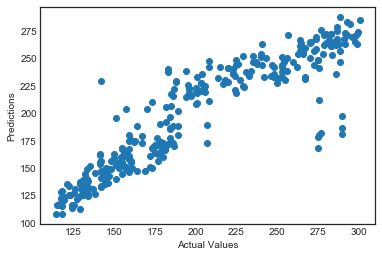

In [70]:
test_pred = linreg.predict(X_test)

plt.scatter(y_test, test_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predictions")

In [71]:

mse = mean_squared_error(y_test, test_pred)

rmse = math.sqrt(mse)
print("The RMSE is: {:.2f}".format(rmse))
      
# Get the Coefficient of determination to check fitness of the model.. % of response variable variation that is explained by model.. % variations in Heating Oil are explained by our inputs 
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

The RMSE is: 23.57
R-squared score (training): 0.814
R-squared score (test): 0.825


(array([164., 170., 138., 179., 112.,  57.,  67.,  86., 116., 129.]),
 array([114. , 132.7, 151.4, 170.1, 188.8, 207.5, 226.2, 244.9, 263.6,
        282.3, 301. ]),
 <a list of 10 Patch objects>)

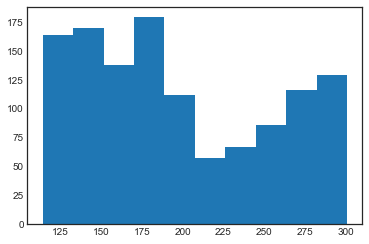

In [45]:
plt.style.use('seaborn-white')
plt.hist(train['Heating_Oil'])

In [74]:
scoring = pd.read_csv("/Users/rezaghaemi/Desktop/RapidMiner:Data Analysis FILES/Lecture files/HeatingOil_Scoring LINEAR REGRESSION.csv")
scoring = scoring.drop('Num_Occupants', 1)

prediction = linreg.predict(scoring)


print(prediction[:50])




[252.73373044 218.01452056 227.5214648  208.97796066 163.5267426
 180.93729046 221.81017583 164.91162483 263.98016375 221.77958033
 220.79212403 264.28486377 212.02669956 213.98348129 253.06661979
 274.96462983 188.36837905 235.88267587 164.54250581 233.14022765
 225.27024703 167.63030047 280.07282136 239.58423643 241.9129182
 134.97908017 227.29876311 144.47069999 233.28127382 226.73606723
 202.2282145  195.69474326 170.63442156 231.2703058  189.04150597
 198.69668751 189.47050807 173.68847321 177.83012196 209.10206051
 232.25773085 167.32490997 162.77065387 137.12459126 209.51614258
 162.49648848 186.7696435  173.58753596 171.48612481 211.85095514]


In [ ]:
#most impact

#train = pd.read_csv("/Users/rezaghaemi/Desktop/RapidMiner:Data Analysis FILES/Lecture files/HeatingOil_Training LINEAR REGRESSION.csv")


'''
scaler = StandardScaler()
scaled_df = scaler.fit_transform(train)
scaled_df = pd.DataFrame(scaled_df, columns=['Insulation', 'Temperature', 'Avg_Age', 'Home_Size', 'Heating_Oil'])


feature_input = ['Insulation', 'Temperature', 'Avg_Age', 'Home_Size']
X_oil = scaled_df[feature_input]
y_oil = scaled_df['Heating_Oil']

X_train, X_test, y_train, y_test = train_test_split(X_oil, y_oil, random_state = 0)


linreg_std = LinearRegression().fit(X_train, y_train)


print('linear model beta coeff (beta): {}'
     .format(linreg_std.coef_))
     ''''
